
# Zadanie 11, podpunkt 4: Modelowanie funkcji f(x) = log(x^2)

In [124]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


Generowanie danych treningowych 

In [125]:
# Generowanie danych
x = np.linspace(1, 10, 1000).reshape(-1, 1) # 1000 punktów od 1 do 10
y = np.log(x**2)

Komórka 3: Budowa i kompilacja modelu sieci neuronowej
Definiujemy architekturę sieci. Dla tej funkcji dwie warstwy ukryte z aktywacją 'relu' powinny być wystarczające. Warstwa wyjściowa ma jeden neuron bez funkcji aktywacji, co jest standardem w regresji.

In [126]:
# Definiowanie modelu
model_log = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1) # Warstwa wyjściowa dla regresji
])

# Kompilacja modelu
model_log.compile(optimizer='adam', loss='mean_squared_error')

# Podsumowanie architektury
model_log.summary()

c:\Users\Maciek\Desktop\NaukaODanychII\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

Komórka 4: Trening modelu

In [127]:
# Callback do zatrzymania treningu, gdy osiągniemy cel
class MseThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MseThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') < self.threshold:
            print(f"\nOsiągnięto błąd poniżej {self.threshold}, przerywam trening.")
            self.model.stop_training = True

mse_callback = MseThresholdCallback(threshold=0.01)

# Trening modelu
history = model_log.fit(
    x,
    y,
    epochs=200, # Ustawiamy większą liczbę epok, callback przerwie trening w odpowiednim momencie
    batch_size=32,
    validation_split=0.2, # Używamy 20% danych do walidacji
    callbacks=[mse_callback],
    verbose=1
)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3006 - val_loss: 2.0685
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1438 - val_loss: 0.4566
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0929 - val_loss: 0.7813
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0870 - val_loss: 0.7409
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0844 - val_loss: 0.7088
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0835 - val_loss: 0.8050
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0810 - val_loss: 0.6828
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0797 - val_loss: 0.7141
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0780 - val_loss: 0.7238
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0762 - val_loss: 0.5174
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0765 - val_loss: 0.5513
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

Komórka 5: Ocena i wizualizacja wyników

Ostateczny błąd średniokwadratowy (MSE): 0.0440
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


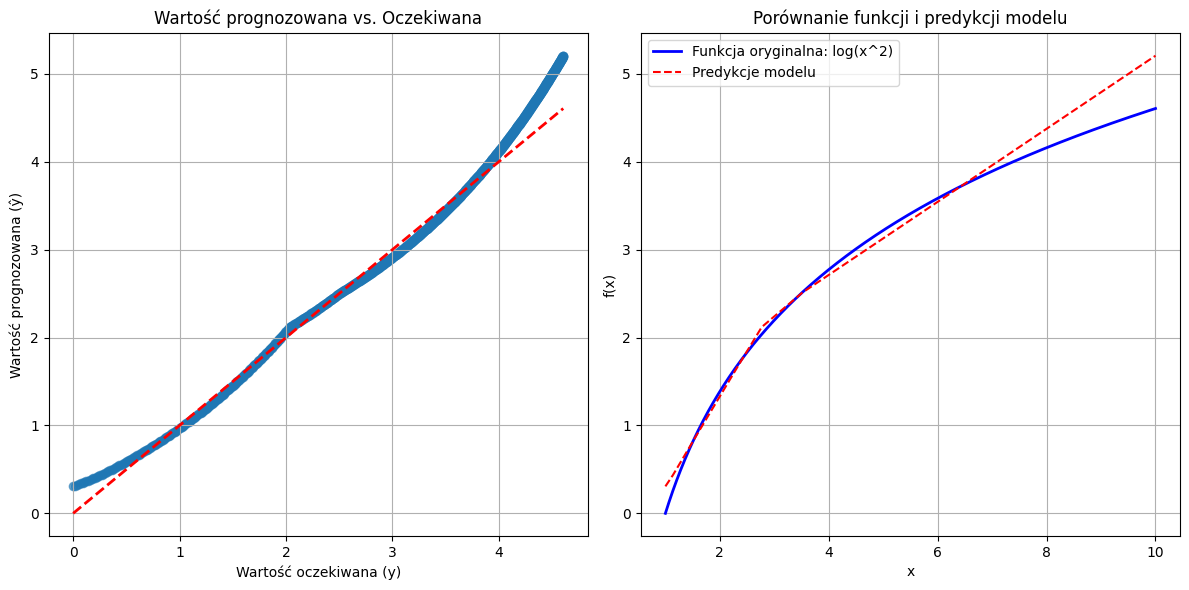

In [128]:
# Ewaluacja na całym zbiorze
loss = model_log.evaluate(x, y, verbose=0)
print(f"Ostateczny błąd średniokwadratowy (MSE): {loss:.4f}")

# Predykcje
y_pred = model_log.predict(x)

# Wizualizacja wyników
plt.figure(figsize=(12, 6))

# Wykres 1: Wartości oczekiwane vs. prognozowane (zgodnie z poleceniem)
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Idealna linia predykcji
plt.title('Wartość prognozowana vs. Oczekiwana')
plt.xlabel('Wartość oczekiwana (y)')
plt.ylabel('Wartość prognozowana (ŷ)')
plt.grid(True)

# Wykres 2: Porównanie funkcji oryginalnej i predykcji modelu
plt.subplot(1, 2, 2)
plt.plot(x, y, label='Funkcja oryginalna: log(x^2)', color='blue', linewidth=2)
plt.plot(x, y_pred, label='Predykcje modelu', color='red', linestyle='--')
plt.title('Porównanie funkcji i predykcji modelu')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Zadanie 12, podpunkt 12.4: Prognozowanie cen nieruchomości i kosztów utrzymania

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ustawiamy ziarno losowości dla powtarzalności wyników
np.random.seed(42)

# --- GENEROWANIE DANYCH ---

# Generujemy dane wejściowe (cechy)
powierzchnia = np.random.uniform(30, 200, 1000)  # m^2
pokoje = np.random.randint(1, 7, 1000)
rok_budowy = np.random.uniform(1980, 2024, 1000)
odleglosc_centrum = np.random.uniform(1, 20, 1000) # km

# Tworzymy zbiór X
X = np.stack([powierzchnia, pokoje, rok_budowy, odleglosc_centrum], axis=1)

# Tworzymy wartości docelowe (y) z logiczną zależnością + szum
# Zakładamy bazową cenę i modyfikujemy ją na podstawie cech
cena_baza = 100000
cena = (cena_baza +
        powierzchnia * 5000 +        # Każdy m^2 zwiększa cenę
        pokoje * 25000 +             # Każdy pokój zwiększa cenę
        (rok_budowy - 1980) * 1000 - # Nowsze domy są droższe
        odleglosc_centrum * 3000 +   # Dalsze od centrum są tańsze
        np.random.normal(0, 25000, 1000)) # Dodajemy losowy szum

koszty = powierzchnia * 10 + pokoje * 50 + np.random.normal(0, 100, 1000)
oplaty = powierzchnia * 2 + np.random.normal(0, 50, 1000)

# Upewniamy się, że wartości nie są ujemne
cena[cena < 0] = 50000
koszty[koszty < 0] = 50
oplaty[oplaty < 0] = 20

# Tworzymy zbiór y
y = np.stack([cena, koszty, oplaty], axis=1)
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Kształt X_train:", X_train.shape)
print("Kształt y_train:", y_train.shape)

Kształt X_train: (800, 4)
Kształt y_train: (800, 3)


Komórka 7: Skalowanie danych

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Komórka 8: Budowa i kompilacja modelu

In [131]:
# Definiowanie modelu
model_nieruchomosci = Sequential([
    Dense(128, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3) # 3 neurony wyjściowe dla 3 wartości docelowych
])

# Kompilacja modelu
model_nieruchomosci.compile(optimizer='adam', loss='mean_squared_error')

# Podsumowanie architektury
model_nieruchomosci.summary()

c:\Users\Maciek\Desktop\NaukaODanychII\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,091 (35.51 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

Komórka 9: Trening modelu

In [132]:
# Trening modelu
history_nieruchomosci = model_nieruchomosci.fit(
    X_train_scaled,
    y_train,
    epochs=300,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 208648273920.0000 - val_loss: 197753323520.0000
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208646553600.0000 - val_loss: 197750865920.0000
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208642752512.0000 - val_loss: 197745623040.0000
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208635068416.0000 - val_loss: 197735661568.0000
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208621092864.0000 - val_loss: 197718671360.0000
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208598319104.0000 - val_loss: 197692063744.0000
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208564224000.0000 - val_loss: 197653331968.0000
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208515563520.0000 - val_loss: 197599821824.0000
Epoch 9/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 208449798144.0000 - val_loss: 197528731648.0000
Epoch 10/300
25/25 ━━━━━━━━━━━━━━━━━━

Komórka 10: Ocena modelu i przykładowa predykcja

In [133]:
# Ocena modelu na zbiorze testowym
test_loss = model_nieruchomosci.evaluate(X_test_scaled, y_test)
print(f"\nBłąd średniokwadratowy na zbiorze testowym: {test_loss:.2f}")

# Generowanie predykcji dla danych testowych
y_pred_nieruchomosci = model_nieruchomosci.predict(X_test_scaled)

# Wyświetlenie kilku przykładowych predykcji w porównaniu do wartości rzeczywistych
print("\n--- Przykładowe predykcje ---")
for i in range(5):
    print(f"Przykład #{i+1}")
    print(f"  > Wartości rzeczywiste: Cena={y_test[i][0]:.0f}, Koszty={y_test[i][1]:.0f}, Opłaty={y_test[i][2]:.0f}")
    print(f"  > Wartości przewidziane: Cena={y_pred_nieruchomosci[i][0]:.0f}, Koszty={y_pred_nieruchomosci[i][1]:.0f}, Opłaty={y_pred_nieruchomosci[i][2]:.0f}\n")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 924809472.0000 

Błąd średniokwadratowy na zbiorze testowym: 924809472.00
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

--- Przykładowe predykcje ---
Przykład #1
  > Wartości rzeczywiste: Cena=657558, Koszty=1142, Opłaty=138
  > Wartości przewidziane: Cena=628145, Koszty=1130, Opłaty=189

Przykład #2
  > Wartości rzeczywiste: Cena=964334, Koszty=1889, Opłaty=345
  > Wartości przewidziane: Cena=998430, Koszty=1814, Opłaty=283

Przykład #3
  > Wartości rzeczywiste: Cena=692686, Koszty=1303, Opłaty=206
  > Wartości przewidziane: Cena=597924, Koszty=1080, Opłaty=183

Przykład #4
  > Wartości rzeczywiste: Cena=638763, Koszty=1067, Opłaty=204
  > Wartości przewidziane: Cena=605631, Koszty=1099, Opłaty=165

Przykład #5
  > Wartości rzeczywiste: Cena=1151118, Koszty=2284, Opłaty=279
  > Wartości przewidziane: Cena=1134281, Koszty=2050, Opłaty=331

